In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import make_regression
%matplotlib inline

In [2]:
np.random.seed(10)
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

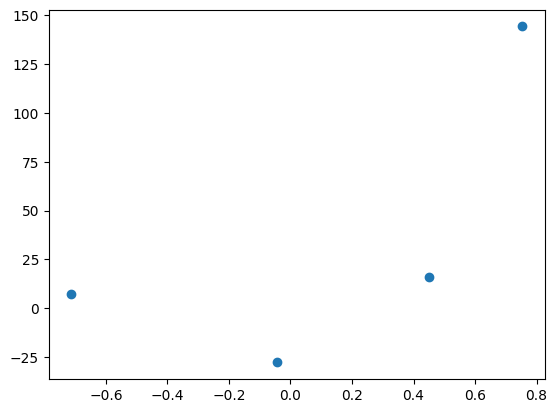

In [3]:
plt.scatter(X,y)
plt.show()

In [4]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [5]:
reg.coef_, reg.intercept_

(array([78.35063668]), 26.15963284313262)

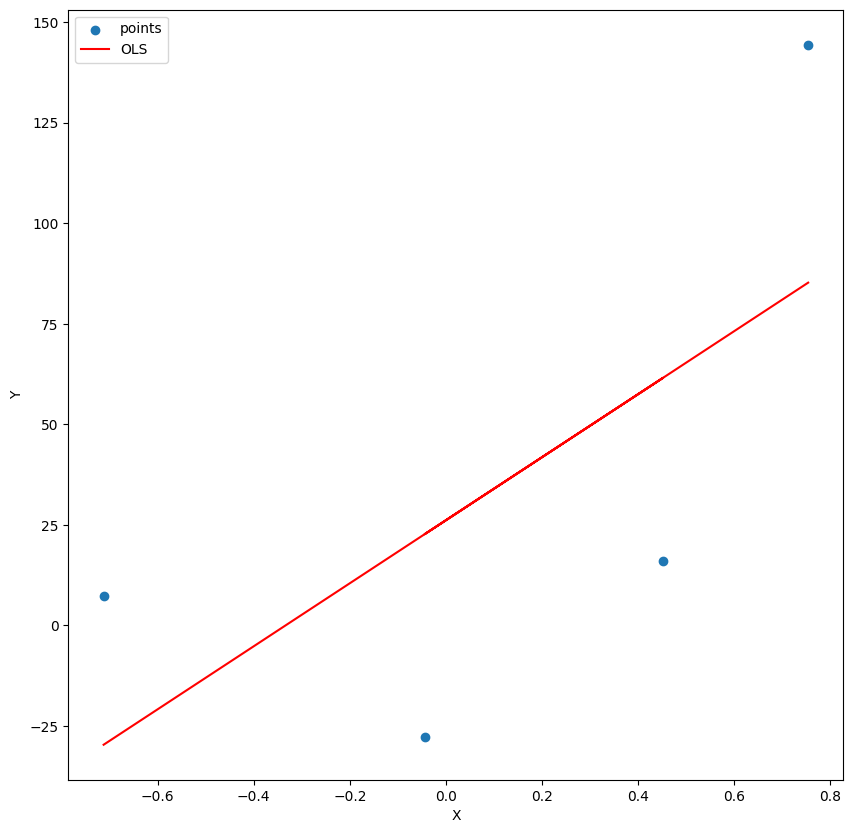

In [6]:
plt.figure(figsize = (10, 10))
plt.scatter(X,y, label = 'points')
plt.plot(X,reg.predict(X),color='red', label = 'OLS')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## gradient descent

In [7]:
m = reg.coef_[0]
m

78.35063667947497

Let us assume that the initial value of b is 1000 while keeping the m fixed. We are taking learning rate of 0.01(I tried at lr = 0.1 and the algorithm diverged.)

In [8]:
b = 1000
y_pred = m * X + b

In [9]:
y_pred

array([[ 944.18373806],
       [1035.3997844 ],
       [ 996.51315548],
       [1059.05807568]])

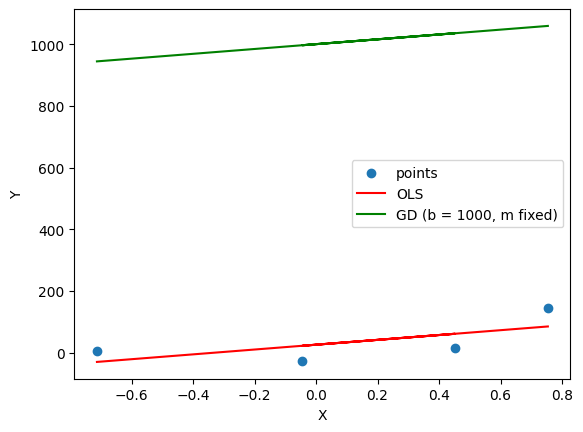

In [10]:
# plt.figure(figsize = (10, 10))
plt.scatter(X,y, label = 'points')
plt.plot(X,reg.predict(X), color='red', label = 'OLS')
plt.plot(X,m * X + b,color='green', label = f'GD (b = {round(b)}, m fixed)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## second epoch

In [11]:
learning_rate = 0.01
def next_b(b):
    return b - learning_rate * 2 * np.sum(m * X + b - y)

In [12]:
b = next_b(b)

In [13]:
b # This is the second value of b

688.3710825098024

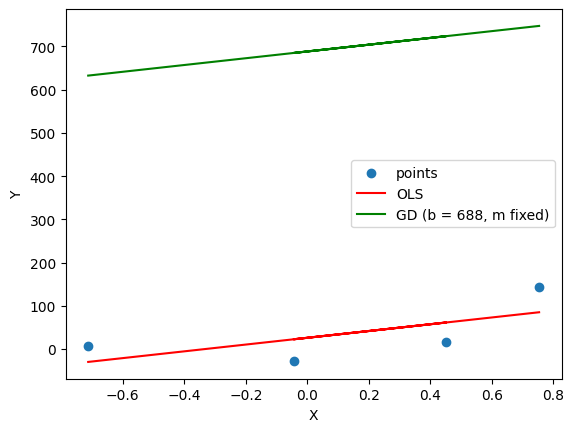

In [14]:
# plt.figure(figsize = (10, 10))
plt.scatter(X,y, label = 'points')
plt.plot(X,reg.predict(X), color='red', label = 'OLS')
plt.plot(X, m * X + b,color='green', label = f'GD (b = {round(b)}, m fixed)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Third epoch

In [15]:
b = next_b(b)

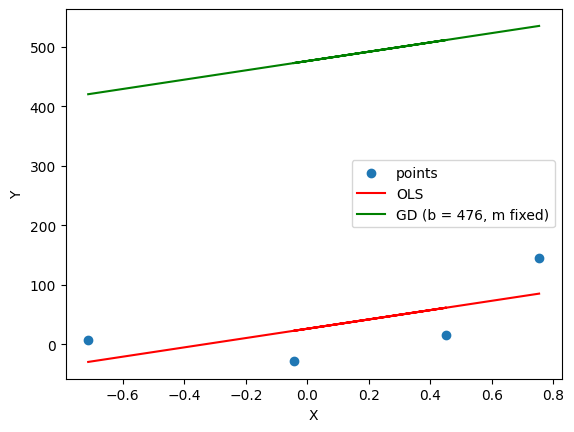

In [16]:
# plt.figure(figsize = (10, 10))
plt.scatter(X,y, label = 'points')
plt.plot(X,reg.predict(X), color='red', label = 'OLS')
plt.plot(X,m * X + b,color='green', label = f'GD (b = {round(b)}, m fixed)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Fourth epoch

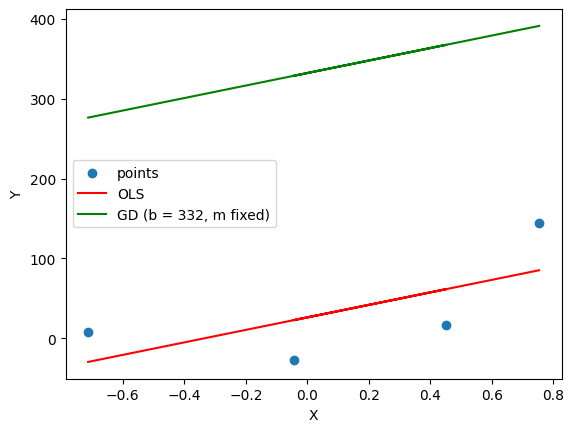

In [17]:
b = next_b(b)
# plt.figure(figsize = (10, 10))
plt.scatter(X,y, label = 'points')
plt.plot(X,reg.predict(X), color='red', label = 'OLS')
plt.plot(X,m * X + b,color='green', label = f'GD (b = {round(b)}, m fixed)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Fifth epoch

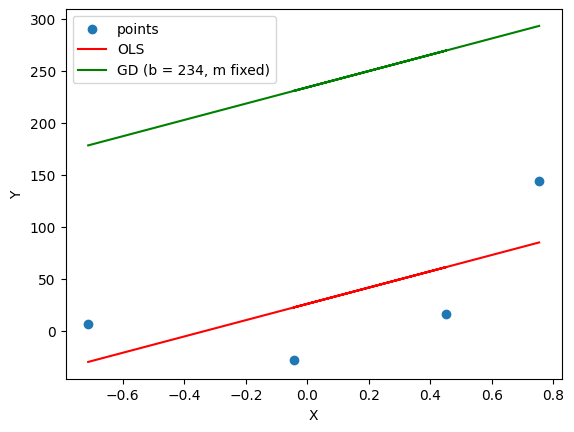

In [18]:
b = next_b(b)
# plt.figure(figsize = (10, 10))
plt.scatter(X,y, label = 'points')
plt.plot(X,reg.predict(X), color='red', label = 'OLS')
plt.plot(X,m * X + b,color='green', label = f'GD (b = {round(b)}, m fixed)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Sixth epoch

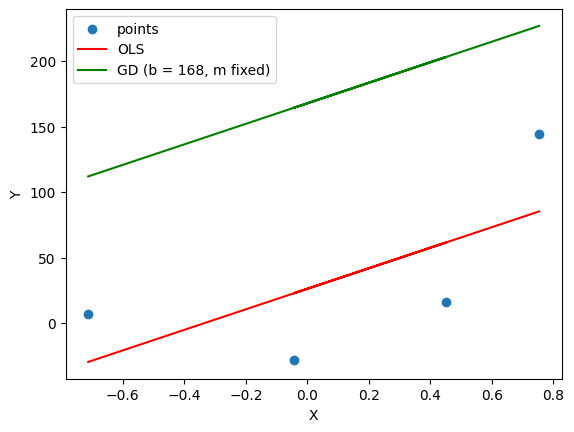

In [19]:
b = next_b(b)
# plt.figure(figsize = (10, 10))
plt.scatter(X,y, label = 'points')
plt.plot(X,reg.predict(X), color='red', label = 'OLS')
plt.plot(X,m * X + b,color='green', label = f'GD (b = {round(b)}, m fixed)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Seventh epoch

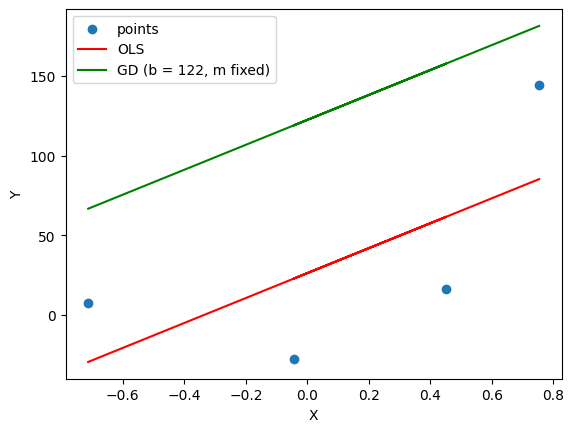

In [20]:
b = next_b(b)
# plt.figure(figsize = (10, 10))
plt.scatter(X,y, label = 'points')
plt.plot(X,reg.predict(X), color='red', label = 'OLS')
plt.plot(X,m * X + b,color='green', label = f'GD (b = {round(b)}, m fixed)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Lets do 10 more epochs and see. 

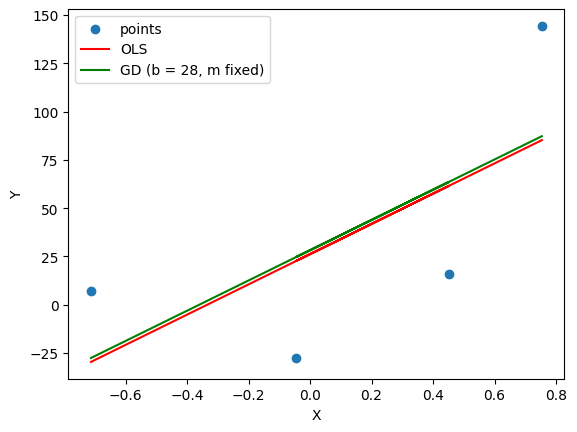

In [21]:
for i in range(10):
    b = next_b(b)
# plt.figure(figsize = (10, 10))
plt.scatter(X,y, label = 'points')
plt.plot(X,reg.predict(X), color='red', label = 'OLS')
plt.plot(X,m * X + b,color='green', label = f'GD (b = {round(b)}, m fixed)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Making our own Gradient descent class

In [22]:
class GDRegressor:

    def __init__(self, learning_rate = 0.01, epochs = 100):
        self.coef_ = m # Since we are making for the above dataset and then finally we will generalize this code
        self.intercept_ = 0 # This is the initial value for b
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):

        # we need to find the final value for b i.e., self.intercept_
        for _ in range(self.epochs):
            self.intercept_ = self.intercept_ - self.lr * 2 * np.sum(m * X_train + self.intercept_ - y_train)

        print(self.intercept_)

    def predict(self, X_test):
        return self.coef_ @ X_test + self.intercept_

In [23]:
gdr = GDRegressor()

In [24]:
gdr.fit(X, y)

26.159632843132616


    Lets try with higher learning rate and lesser epochs.

In [25]:
gdr2 = GDRegressor(learning_rate = 0.02, epochs = 10)
gdr2.fit(X, y)

26.158676405508537


# Making our own GD Regressor class by NOT keeping m fixed

In [26]:
class GDRegressor:
    def __init__(self, learning_rate = 0.01, epochs = 100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        self.intercept_ = 0
        self.coef_ = 1
        X = X_train.ravel()
        y = y_train

        for _ in range(self.epochs):
            self.coef_ = self.coef_ - self.lr * 2 * np.sum((self.coef_ * X + self.intercept_ - y) * X)
            self.intercept_ = self.intercept_ - self.lr * 2 * np.sum(self.coef_ * X + self.intercept_ - y)

        print(self.coef_, self.intercept_)

    def predict(self, X_test):
        return self.coef_ * X_test.ravel() + self.intercept_

In [27]:
gdr = GDRegressor(learning_rate = 0.1, epochs = 80)

In [28]:
gdr.fit(X, y)

78.35063666766042 26.15963284457515


    Let us compare this with our original model reg.

In [29]:
reg.coef_[0], reg.intercept_

(78.35063667947497, 26.15963284313262)